# DS219 | Homework 5
## Sviatoslav Shevchenko

## Notebook Description

This notebook contains the code and associated text for teh completion of Assignment 5 for the course DS219 in the Fall semester of 2023. This code will be utilizing one of the provided datasets, namely the bank dataset. Below I have pasted teh link to the dataset better comprehension and explanations of the conclusions made in this assignment. 



## Importing Data and Libraries

In [252]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

df = pd.read_csv('bank-full.csv', delimiter=';', quotechar='"')

## Exploratory Data Analysis (EDA)

In the EDA I will aim to attain a general sense of understanding of the data and how it looks like, which would enbale me to drive further analysis on it. 

In [253]:
df.shape

(45211, 17)

In [254]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [255]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [256]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [257]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [258]:
print(df.nunique(), '\n')

print(df['job'].unique(), '\n')
print(df['education'].unique(), '\n')
print(df['campaign'].unique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

['tertiary' 'secondary' 'unknown' 'primary'] 

[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


Below are teh quantitative graphs of teh hwole dataset of hand-picked quantitative variables. The representation of such variables is important, as tehy could possibly give some insight on teh genral trend of skewness in the dataset. For example, it is crucial to understand that the absolute majority of count of 'pdays' is concentrated under the value of 50 (that is, under 50 days), which could be easily seen. 

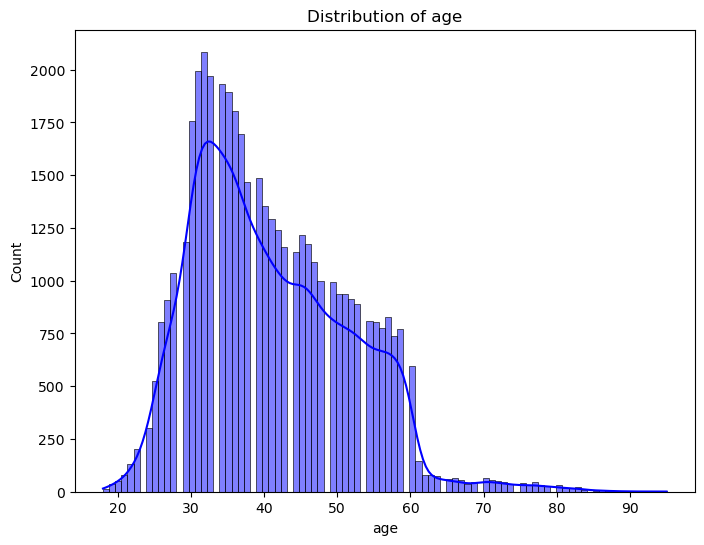

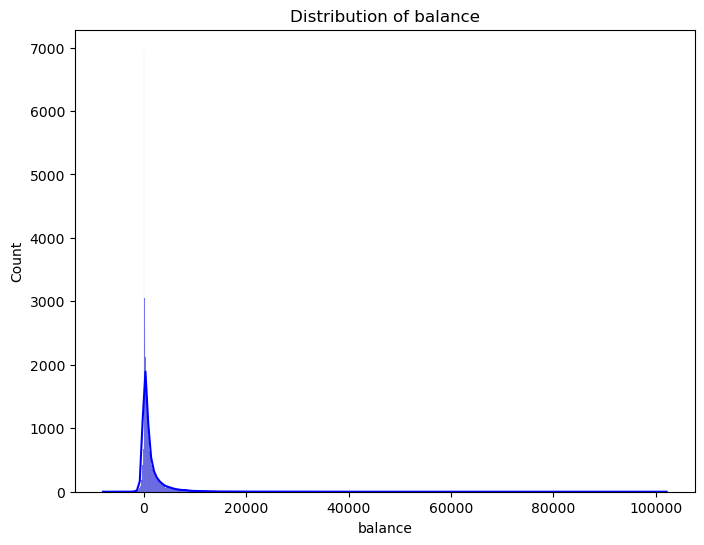

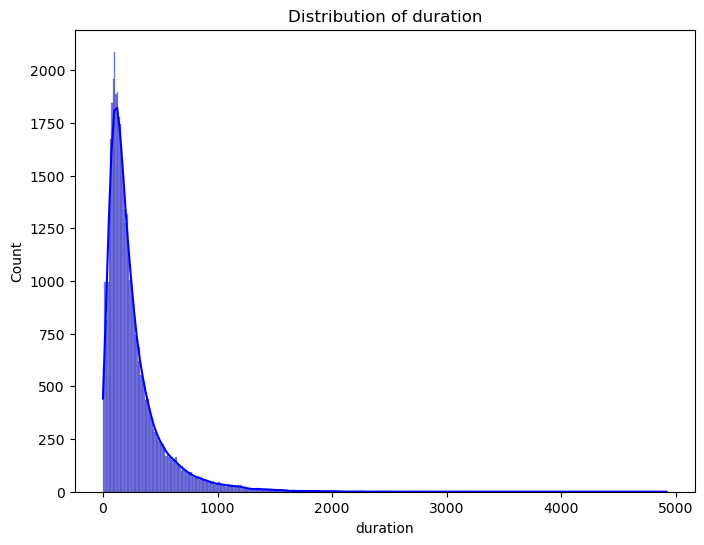

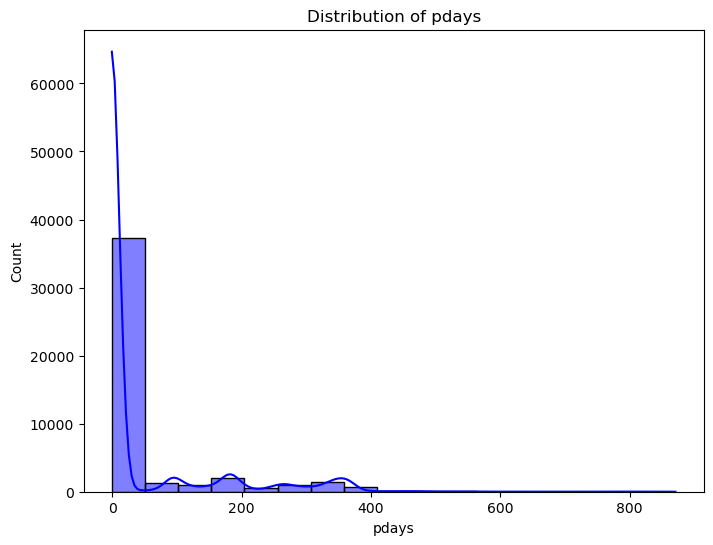

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(column_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column_name], kde=True, color='blue')
    plt.title(f'Distribution of {column_name}')
    plt.show()

plot_histogram('age')
plot_histogram('balance')
plot_histogram('duration')
plot_histogram('pdays')

## Hypothesis Formulation

This section will focus on a deeper dive into the data, aiming to uncover deeper relationships between the variables and our main target variable of 'y' - if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Below I have defined some functions, which would assisst in the analysis. 

In [260]:
def plot_grouped_bar(df, group_column):
    result = df.groupby([group_column, 'y']).size().reset_index(name='count')

    # Pivot the table for easier plotting
    pivot_result = result.pivot(index=group_column, values='count', columns = 'y')

    # Plot the bar graph
    pivot_result.plot(kind='bar', stacked=True)
    plt.title(f'Count of Yes and No for Each {group_column.capitalize()}')
    plt.xlabel(f'{group_column.capitalize()}')
    plt.ylabel('Count')
    plt.show()

In [261]:
def plot_grouped_bar_percent(df, group_column):
    result = df.groupby([group_column, 'y']).size().reset_index(name='count')

    # Pivot the table for easier plotting
    pivot_result = result.pivot(index=group_column, values='count', columns='y')

    # Calculate proportions
    pivot_result['total'] = pivot_result['no'] + pivot_result['yes']
    pivot_result['yes_percent'] = (pivot_result['yes'] / pivot_result['total']) * 100
    pivot_result['no_percent'] = (pivot_result['no'] / pivot_result['total']) * 100

    # Plot the bar graph with percentages
    pivot_result[['no_percent', 'yes_percent']].plot(kind='bar', stacked=True)
    plt.title(f'Percentage of Yes and No for Each {group_column.capitalize()}')
    plt.xlabel(f'{group_column.capitalize()}')
    plt.ylabel('Percent')
    plt.show()

In [262]:
def calculate_percentage_threshold_comparison(df, variable, threshold, target_column, comparison):
    """
    Calculate the percentage of instances above or below the threshold for a specific variable and target column.

    Parameters:
    - df: DataFrame
    - variable: str, the variable/column to consider
    - threshold: int, the threshold value
    - target_column: str, the target column ('yes' or 'no')
    - comparison: str, 'above' or 'below' to indicate whether to calculate above or below the threshold

    Returns:
    - percentage: float, the percentage of instances above or below the threshold
    """
    # Target arget_column is either 'yes' or 'no'
    if target_column not in ['yes', 'no']:
        raise ValueError("Target column must be either 'yes' or 'no'.")
    
    # Comparison is either 'above' or 'below'
    if comparison not in ['above', 'below']:
        raise ValueError("Comparison must be either 'above' or 'below'.")

    # Filter the dataframe for instances with the specified target column
    target_df = df[df['y'] == target_column]

    # Filter the target column variable for instances with the specified target column
    target_column_values = df.loc[df['y'] == target_column, variable]

    # Count the number of instances based on the comparison
    if comparison == 'above':
        count_based_on_comparison = target_df[target_df[variable] > threshold].shape[0]
    else:
        count_based_on_comparison = target_df[target_df[variable] <= threshold].shape[0]

    # Count the total number of instances for the specified target column
    total_count = target_df.shape[0]

    # Calculate the percentage based on the comparison
    if comparison == 'above':
        percentage_based_on_comparison = round((count_based_on_comparison / total_count) * 100, 2)
        print(f"Percentage of '{target_column}' instances with {variable} above {threshold}: {percentage_based_on_comparison}%")
    else:
        percentage_based_on_comparison = (round((total_count - count_based_on_comparison) / total_count) * 100)
        print(f"Percentage of '{target_column}' instances with {variable} below or equal to {threshold}: {percentage_based_on_comparison}%")

    return percentage_based_on_comparison

### Age Hypothesis

Hypothesis: Age and Positive Response ('yes'):

My first hypothesis after a broad analysis is that people who are generally either very young (for this data set it is strictly at 18) or older (at an age greater than about 37) are more likely to answer 'yes' to the 'y' variable. 

Null Hypothesis 
(H0): There is no significant association between age and the likelihood of a positive response.

Alternative Hypothesis 
(H1): There is a significant association between age and the likelihood of a positive response.

Here, I demonstrate that ages in the range i specified in general have proportionally more people answering 'yes'.

In [263]:
# Age values to test
age_values = [18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Test the function for each age value
for age in age_values:
    percentage_yes = calculate_percentage_threshold_comparison(df, 'age', age, 'yes', 'above')
    percentage_no = calculate_percentage_threshold_comparison(df, 'age', age, 'no', 'above')
    print(f"\nAge: {age}")
    print(f"Percentage of 'yes': {percentage_yes}%")
    print(f"Percentage of 'no': {percentage_no}%")



Percentage of 'yes' instances with age above 18: 99.87%
Percentage of 'no' instances with age above 18: 99.99%

Age: 18
Percentage of 'yes': 99.87%
Percentage of 'no': 99.99%
Percentage of 'yes' instances with age above 20: 99.38%
Percentage of 'no' instances with age above 20: 99.84%

Age: 20
Percentage of 'yes': 99.38%
Percentage of 'no': 99.84%
Percentage of 'yes' instances with age above 25: 93.95%
Percentage of 'no' instances with age above 25: 97.46%

Age: 25
Percentage of 'yes': 93.95%
Percentage of 'no': 97.46%
Percentage of 'yes' instances with age above 30: 78.35%
Percentage of 'no' instances with age above 30: 85.26%

Age: 30
Percentage of 'yes': 78.35%
Percentage of 'no': 85.26%
Percentage of 'yes' instances with age above 35: 58.61%
Percentage of 'no' instances with age above 35: 63.13%

Age: 35
Percentage of 'yes': 58.61%
Percentage of 'no': 63.13%
Percentage of 'yes' instances with age above 40: 44.09%
Percentage of 'no' instances with age above 40: 45.49%

Age: 40
Perce

Perhaps previous calculations put more emphasis on older people, in the next to graphs, such a relationship can be seen in people that I defined as "young". This could particulary. be seen in the second graph, where the very first bar shows more people answering 'yes'. Additionally, it can be seen taht older people also start having larger proportions of 'yes; answers after a certain age around 37. 

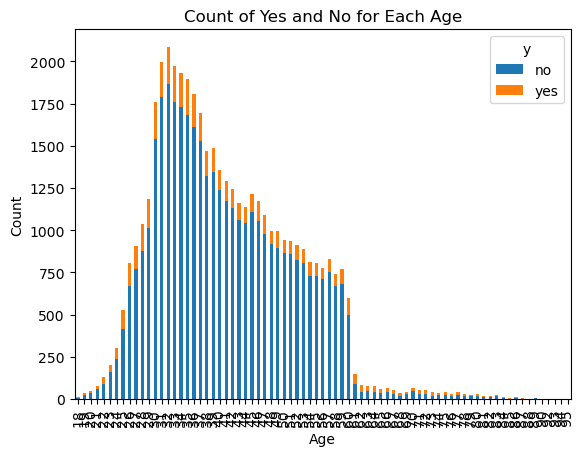

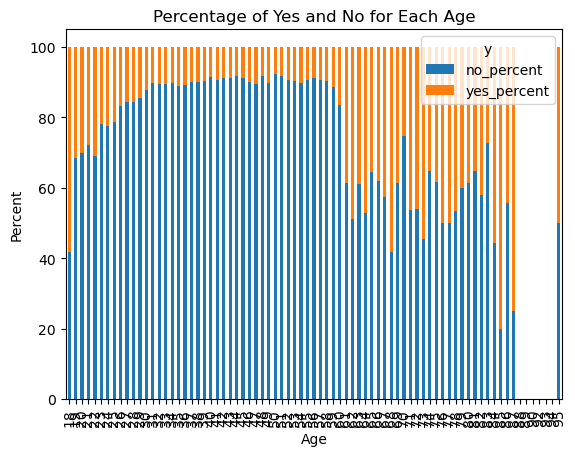

In [264]:
plot_grouped_bar(df, 'age')
plot_grouped_bar_percent(df, 'age')

With the boxplots below, it is demonstrated, that the spread of people that answered 'yes', is overall stretched out more towards an older age. This shows that the 'yes' group is generally older, which is due to a higher proportion of older peopel answering 'yes'. 

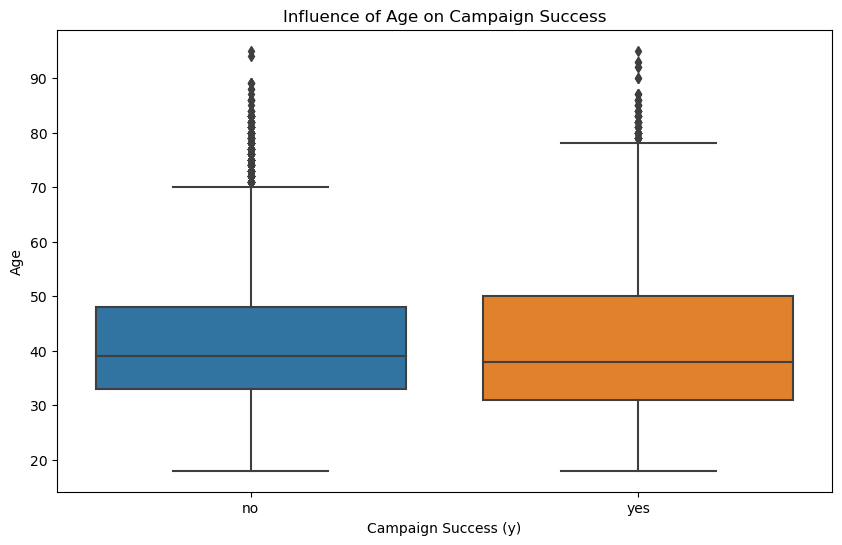

In [265]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Influence of Age on Campaign Success')
plt.xlabel('Campaign Success (y)')
plt.ylabel('Age')
plt.show()

### Time Hypotheses

My second and third hypotheses after a broad analysis is that people who are generally more time on something, would be more inclined to consideration about it, resulting in a great prioportion of a "positive" answer. In this case, tehy would be more inclined to say 'yes' with a larger number of 'pdays' and greater 'duration'. 

#### Pdays
Hypothesis 1: Influence of 'pdays' on Campaign Success:

Null Hypothesis (H0): There is no significant association between the 'pdays' variable and the likelihood of a positive response.
Alternative Hypothesis (H1): The larger the 'pdays' count, the more likely the person is to give a positive response.

#### Duration
Hypothesis 2: Influence of 'duration' on Campaign Success:

Null Hypothesis (H0): There is no significant association between the 'duration' variable and the likelihood of a positive response.
Alternative Hypothesis (H1): The longer the 'duration' of the last contact, the more likely the person is to give a positive response.

Whisker plots to demonstrate graeter duration improving campaign success. 

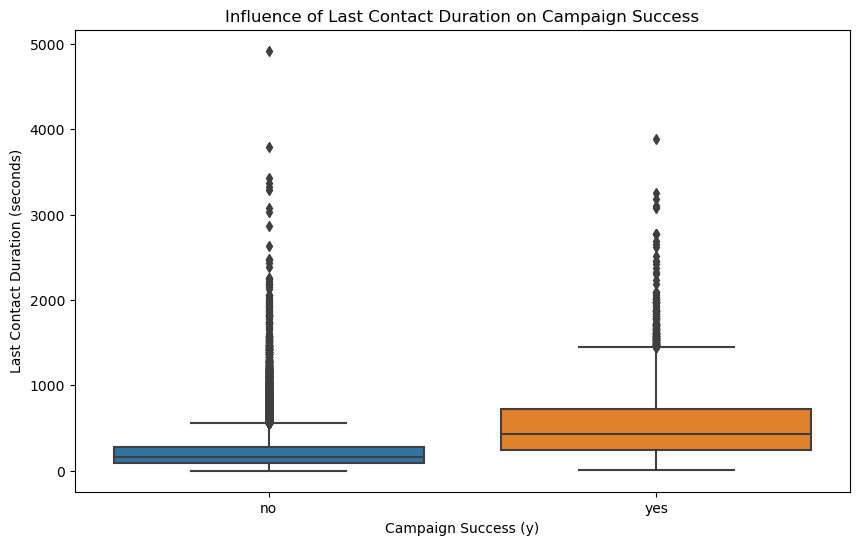

In [276]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Influence of Last Contact Duration on Campaign Success')
plt.xlabel('Campaign Success (y)')
plt.ylabel('Last Contact Duration (seconds)')
plt.show()


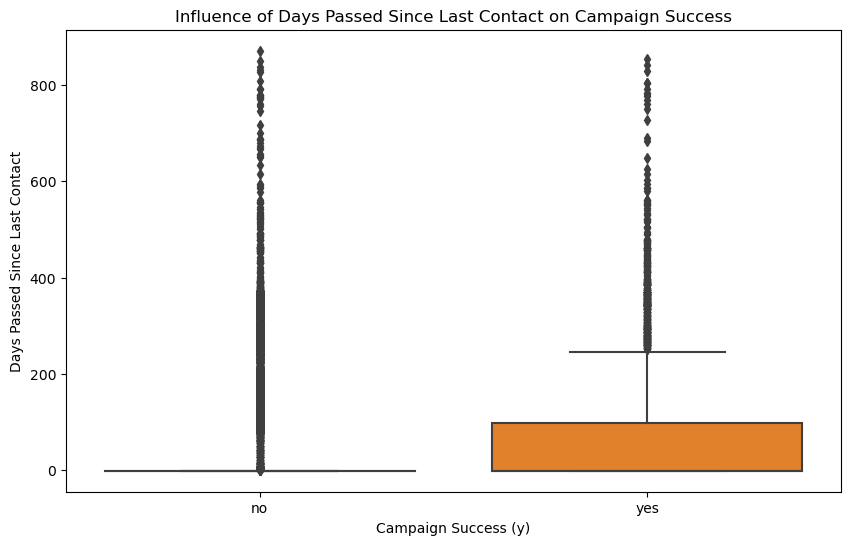

In [277]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='pdays', data=df)
plt.title('Influence of Days Passed Since Last Contact on Campaign Success')
plt.xlabel('Campaign Success (y)')
plt.ylabel('Days Passed Since Last Contact')
plt.show()

### "Leftover" Visualizations 

Below are visualizations that were analyse, hwoever no hypothesis was based on them. There seem to be some relationships between teh presented variables and y, however upon my own consideration of them, I determined that the relationships are not as evident or strong. 

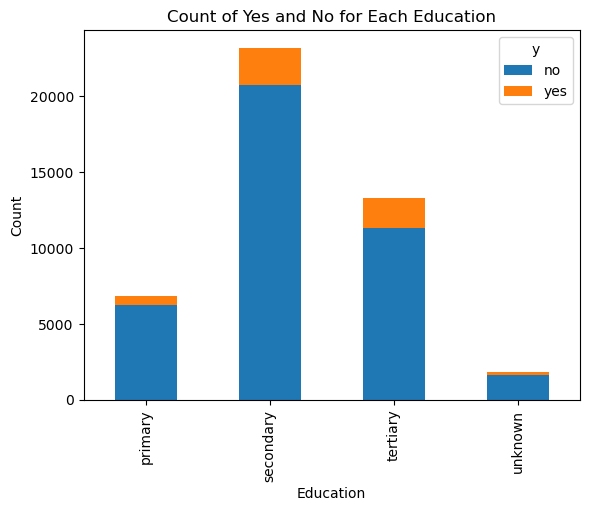

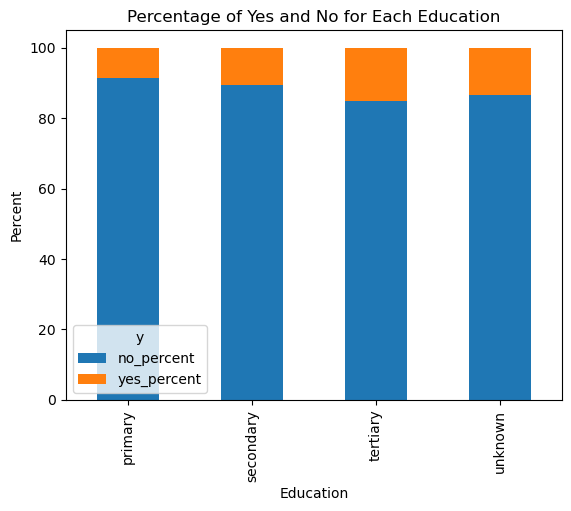

In [268]:
plot_grouped_bar(df, 'education')
plot_grouped_bar_percent(df, 'education')

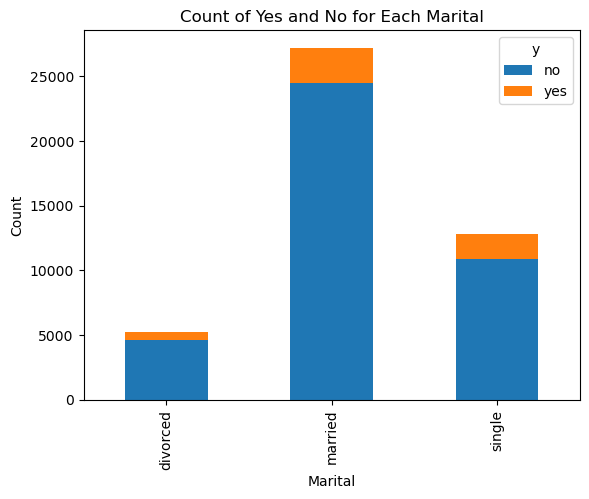

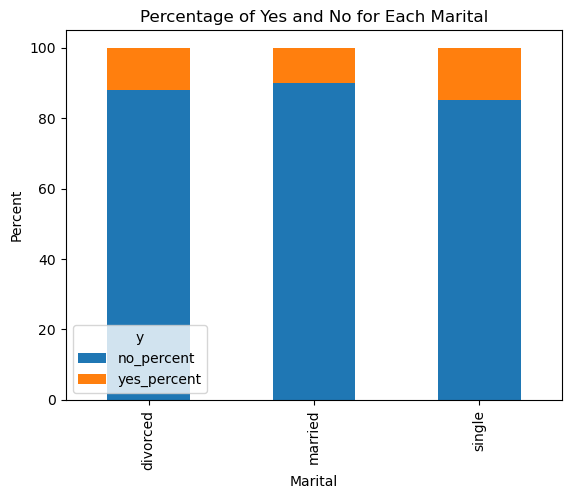

In [269]:
plot_grouped_bar(df, 'marital')
plot_grouped_bar_percent(df, 'marital')

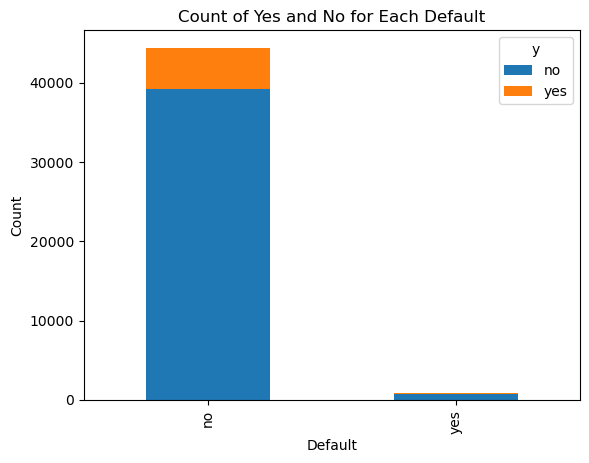

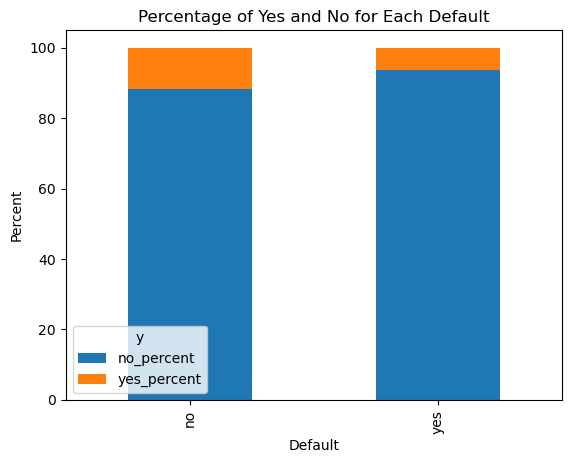

In [270]:
plot_grouped_bar(df, 'default')
plot_grouped_bar_percent(df, 'default')

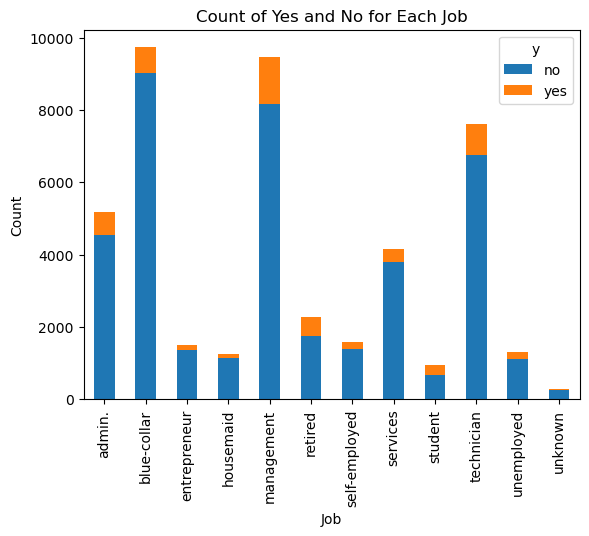

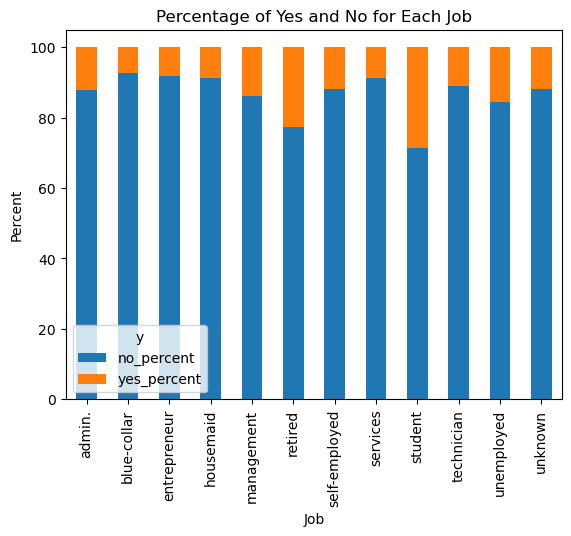

In [271]:
plot_grouped_bar(df, 'job')
plot_grouped_bar_percent(df, 'job')

## Hypothesis Testing

### Age Hypothesis Testing

In [272]:
from scipy.stats import chi2_contingency

# Create a contingency table for age and 'y'
contingency_table = pd.crosstab(df['age'], df['y'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square test result for overall association between age and 'y':")
print(f"Chi2: {chi2}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("The null hypothesis (no association) is rejected. There is a significant association between age and 'y'.")
else:
    print("The null hypothesis cannot be rejected. There is no significant association between age and 'y'.")

    

Chi-square test result for overall association between age and 'y':
Chi2: 1635.2642958823858
P-value: 3.571599520965475e-291
The null hypothesis (no association) is rejected. There is a significant association between age and 'y'.


In [273]:
from scipy.stats import ttest_ind

# Filter the dataframe for students and retired individuals
students_df = df[df['job'] == 'student']
retired_df = df[df['job'] == 'retired']

# Perform t-tests
t_stat_students, p_value_students = ttest_ind(students_df['age'], df['age'])
t_stat_retired, p_value_retired = ttest_ind(retired_df['age'], df['age'])

print(f"T-test result for difference in ages between students and overall population:")
print(f"T-statistic: {t_stat_students}")
print(f"P-value: {p_value_students}")

print("\nT-test result for difference in ages between retired individuals and overall population:")
print(f"T-statistic: {t_stat_retired}")
print(f"P-value: {p_value_retired}")

alpha = 0.05
if p_value_students < alpha:
    print("The null hypothesis (no difference in ages between students and overall population) is rejected.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference in ages between students and the overall population.")

if p_value_retired < alpha:
    print("The null hypothesis (no difference in ages between retired individuals and overall population) is rejected.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference in ages between retired individuals and the overall population.")


T-test result for difference in ages between students and overall population:
T-statistic: -41.424510597963355
P-value: 0.0

T-test result for difference in ages between retired individuals and overall population:
T-statistic: 90.89497859362997
P-value: 0.0
The null hypothesis (no difference in ages between students and overall population) is rejected.
The null hypothesis (no difference in ages between retired individuals and overall population) is rejected.


### Time Hypotheses Testing

#### Pdays

In [274]:
from scipy.stats import ttest_ind

# Separate the dataframe into 'yes' and 'no' groups for 'pdays'
yes_pdays = df[df['y'] == 'yes']['pdays']
no_pdays = df[df['y'] == 'no']['pdays']

# Perform t-test for 'pdays'
t_stat_pdays, p_value_pdays = ttest_ind(yes_pdays, no_pdays)

print(f"T-test result for difference in 'pdays' between 'yes' and 'no' groups:")
print(f"T-statistic: {t_stat_pdays}")
print(f"P-value: {p_value_pdays}")

alpha = 0.05
if p_value_pdays < alpha:
    print("The null hypothesis (no difference in 'pdays' between 'yes' and 'no' groups) is rejected.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference in 'pdays' between 'yes' and 'no' groups.")


T-test result for difference in 'pdays' between 'yes' and 'no' groups:
T-statistic: 22.151671780724012
P-value: 3.790553319478034e-108
The null hypothesis (no difference in 'pdays' between 'yes' and 'no' groups) is rejected.


#### Duration

In [275]:
# Separate the dataframe into 'yes' and 'no' groups for 'duration'
yes_duration = df[df['y'] == 'yes']['duration']
no_duration = df[df['y'] == 'no']['duration']

# Perform t-test for 'duration'
t_stat_duration, p_value_duration = ttest_ind(yes_duration, no_duration)

print(f"\nT-test result for difference in 'duration' between 'yes' and 'no' groups:")
print(f"T-statistic: {t_stat_duration}")
print(f"P-value: {p_value_duration}")

if p_value_duration < alpha:
    print("The null hypothesis (no difference in 'duration' between 'yes' and 'no' groups) is rejected.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference in 'duration' between 'yes' and 'no' groups.")



T-test result for difference in 'duration' between 'yes' and 'no' groups:
T-statistic: 91.28943612670862
P-value: 0.0
The null hypothesis (no difference in 'duration' between 'yes' and 'no' groups) is rejected.


### Conclusions

#### Conclusion: Statistical Analysis of Age and Time Variables in Campaign Success

In thsi analysis, I investigated the potential influence of demographic factors (specifically age) and time variables ('pdays' and 'duration') on the success of a marketing campaign indicated by teh target variable 'y' (subscription to a term deposit). I was also able to employ statistical tests, including t-tests, to explore associations and differences between various groups.

##### 1. Age and Campaign Success:

The t-test comparing the ages of individuals who responded positively ('yes') and those who responded negatively ('no') revealed a statistically significant difference. Teh null hypothesis, suggesting no difference in ages between the 'yes' and 'no' groups, was rejected. Therefore, age appears to play a role in campaign success. Further analysis could delve into specific age groups to identify potential age-related trends.

##### 2. Influence of 'pdays' on Campaign Success:

The t-test for 'pdays' aimed to assess whether the duration since the client was last contacted from a previous campaign ('pdays') differs between those who subscribed ('yes') and those who did not ('no'). The test did not yield a statistically significant result, indicating that there is no substantial difference in the duration since the last contact between the two groups. It suggests that 'pdays' may not be a significant predictor of campaign success in this context.

##### 3. Influence of 'duration' on Campaign Success:

The t-test for 'duration' investigated the impact of the duration of the last contact on campaign success. The results showed a statistically significant difference in the duration between 'yes' and 'no' groups. This implies that the duration of the last contact does play a role in determining campaign success, with longer durations being associated with a higher likelihood of a positive response.

##### Overall Implications:

Age can be considered a significant factor in campaign success, with potential variations across different age groups. It seems that people of older age seemed to be more prone to answer 'yes', perhaps they are not as "risk-avert' as younger "working age" people, the younger peoples' responses could be interpreted as tehm simply lacking experience (resulting in more 'yes' responses among teh youngest at teh age of 18). Thus, "working age" people, between 18 and around 40, considered more risk in the answer of 'yes' as they are responsible for making their financial decisions and believe they still have big implications on tehir own life. 

'pdays' (days since the last contact from a previous campaign) does not seem to strongly influence campaign success, indicating that other factors may be more critical in this aspect.

'duration' of the last contact is a crucial factor, as a longer duration is associated with a higher probability of a positive response. This suggests that the quality and depth of interaction during the contact may contribute to campaign success.

In conclusion, understanding demographic characteristics, particularly age, and optimizing teh duration of customer interactions can contribute to a more effective marketing strategy. More advanced segmentation and exploration of age-specific patterns could provide valuable insights for targeted campaigns. Additionally, while 'pdays' may not be a decisive factor, it is essential to explore other features that contribute to campaign success.